<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-Exploration" data-toc-modified-id="Initial-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial Exploration</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-into-a-Dataframe" data-toc-modified-id="Loading-the-data-into-a-Dataframe-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the data into a Dataframe</a></span></li><li><span><a href="#Cleaning-up-our-Dataframe" data-toc-modified-id="Cleaning-up-our-Dataframe-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cleaning up our Dataframe</a></span><ul class="toc-item"><li><span><a href="#Apply-function-to-each-cell" data-toc-modified-id="Apply-function-to-each-cell-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Apply function to each cell</a></span></li><li><span><a href="#Renaming-columns-for-easier-selection" data-toc-modified-id="Renaming-columns-for-easier-selection-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Renaming columns for easier selection</a></span></li><li><span><a href="#Choosing-a-column-for-reindexing" data-toc-modified-id="Choosing-a-column-for-reindexing-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Choosing a column for reindexing</a></span></li></ul></li><li><span><a href="#Visualizing-Features" data-toc-modified-id="Visualizing-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing Features</a></span><ul class="toc-item"><li><span><a href="#Basic-Histograms" data-toc-modified-id="Basic-Histograms-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Basic Histograms</a></span></li><li><span><a href="#Groupby-and-merging-for-richer-visuals" data-toc-modified-id="Groupby-and-merging-for-richer-visuals-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Groupby and merging for richer visuals</a></span></li></ul></li></ul></li><li><span><a href="#Text-Analysis" data-toc-modified-id="Text-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text Analysis</a></span></li></ul></div>

# Exploratory Analysis with Pandas

This course will focus on manipulating semi-structured text data, and trying to plot interesting things to help guide our analysis.  We have a fairly typical, slightly-messy text data set, and we need to force it into a data structure, clean it, trim it, and start plotting features.  We'll be using an open-source dataset from https://open.fda.gov/.  This dataset contains a huge number of drugs, both OTC and Prescription, that have been reviewed in some manner by the FDA and assigned an FDA label.  Our goal is to parse down and investigate this dataset for the purpose of determining potential drug-drug interactions and similarities.

## Initial Exploration 

In [44]:
# Basic imports
%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)

import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

First things first: let's load some data, and then try to force it into a usable data structure.  We'll be focusing on the [`pandas.Dataframe`](https://pandas.pydata.org/), which is a very popular and powerful workhorse package for data analysis in python.  A *Dataframe* is essentially a numpy array, but with added bonus of allowing label-based indexing, selection and querying, along with a host of helpful functions for analysis and visualization.

### Loading the data into a Dataframe

In [45]:
# load the data (json format)
data = json.load(open('/pghbio/dbmi/batmanlab/Data/drugEmbedding/drug-label-0001-of-0007.json'))
# Check out the top-level groups
print(data.keys())
data['meta']

dict_keys(['meta', 'results'])


{'last_updated': '2019-02-18',
 'terms': 'https://open.fda.gov/terms/',
 'results': {'skip': 0, 'total': 134239, 'limit': 20000},
 'license': 'https://open.fda.gov/license/',
 'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.'}

In [46]:
# Force the 'results' group into a dataframe.
# 'json_normalize' helps collapse nested json groups into a flatter structure that's more tabular in nature.
df = json_normalize(data['results'])
print('Columns:')
print(df.columns)
print('Basic Info:')
print(df.info(memory_usage='deep'))
# Print out the first 5 rows and all 150+ columns.
with pd.option_context('display.max_columns', 160):
    display(df.head())

Columns:
Index(['abuse', 'accessories', 'active_ingredient', 'active_ingredient_table',
       'adverse_reactions', 'adverse_reactions_table',
       'animal_pharmacology_and_or_toxicology', 'ask_doctor',
       'ask_doctor_or_pharmacist', 'ask_doctor_or_pharmacist_table',
       ...
       'use_in_specific_populations_table', 'user_safety_warnings', 'version',
       'veterinary_indications', 'warnings', 'warnings_and_cautions',
       'warnings_and_cautions_table', 'warnings_table', 'when_using',
       'when_using_table'],
      dtype='object', length=152)
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 152 entries, abuse to when_using_table
dtypes: object(152)
memory usage: 122.1 MB
None


,abuse,accessories,active_ingredient,active_ingredient_table,adverse_reactions,adverse_reactions_table,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,ask_doctor_or_pharmacist_table,ask_doctor_table,assembly_or_installation_instructions,boxed_warning,boxed_warning_table,calibration_instructions,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,carcinogenesis_and_mutagenesis_and_impairment_of_fertility_table,cleaning,clinical_pharmacology,clinical_pharmacology_table,clinical_studies,clinical_studies_table,components,contraindications,contraindications_table,controlled_substance,dependence,description,description_table,do_not_use,do_not_use_table,dosage_and_administration,dosage_and_administration_table,dosage_forms_and_strengths,dosage_forms_and_strengths_table,drug_abuse_and_dependence,drug_abuse_and_dependence_table,drug_and_or_laboratory_test_interactions,drug_interactions,drug_interactions_table,effective_time,environmental_warning,general_precautions,general_precautions_table,geriatric_use,geriatric_use_table,health_care_provider_letter,health_care_provider_letter_table,how_supplied,how_supplied_table,id,inactive_ingredient,inactive_ingredient_table,indications_and_usage,indications_and_usage_table,information_for_owners_or_caregivers,information_for_patients,information_for_patients_table,instructions_for_use,instructions_for_use_table,intended_use_of_the_device,keep_out_of_reach_of_children,keep_out_of_reach_of_children_table,labor_and_delivery,laboratory_tests,laboratory_tests_table,mechanism_of_action,mechanism_of_action_table,microbiology,microbiology_table,nonclinical_toxicology,nonclinical_toxicology_table,nonteratogenic_effects,nursing_mothers,openfda.application_number,openfda.brand_name,openfda.generic_name,openfda.is_original_packager,openfda.manufacturer_name,openfda.nui,openfda.original_packager_product_ndc,openfda.package_ndc,openfda.pharm_class_cs,openfda.pharm_class_epc,openfda.pharm_class_moa,openfda.pharm_class_pe,openfda.product_ndc,openfda.product_type,openfda.route,openfda.rxcui,openfda.spl_id,openfda.spl_set_id,openfda.substance_name,openfda.unii,openfda.upc,other_safety_information,overdosage,overdosage_table,package_label_principal_display_panel,package_label_principal_display_panel_table,patient_medication_information,patient_medication_information_table,pediatric_use,pediatric_use_table,pharmacodynamics,pharmacodynamics_table,pharmacogenomics,pharmacokinetics,pharmacokinetics_table,precautions,precautions_table,pregnancy,pregnancy_or_breast_feeding,pregnancy_table,purpose,purpose_table,questions,questions_table,recent_major_changes,recent_major_changes_table,references,risks,safe_handling_warning,safe_handling_warning_table,set_id,spl_medguide,spl_medguide_table,spl_patient_package_insert,spl_patient_package_insert_table,spl_product_data_elements,spl_unclassified_section,spl_unclassified_section_table,statement_of_identity,statement_of_identity_table,stop_use,stop_use_table,storage_and_handling,storage_and_handling_table,teratogenic_effects,teratogenic_effects_table,troubleshooting,use_in_specific_populations,use_in_specific_populations_table,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,warnings_and_cautions_table,warnings_table,when_using,when_using_table
0,NaN,NaN,[HPUS Active Ingredients Each dose contains eq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Directions Initially depress pump until prime...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2eb93d7c-3310-4b93-e054-00144ff88e88,"[Citric acid, potassium sorbate, purified water.]",NaN,"[Uses Homeopathic remedy for distractability, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Keep this and all medication out of reach of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[BrightSpark],"[ARG NIT, ARSENICUM IOD, HYOSCYAMUS, VERATRUM ...",[True],[Silver Star Brands],NaN,NaN,[68703

I think we might be able to work with this now.  We've used `json_normalize` to flatten the semi-structured format into something tabular.  There are 152 column labels, but we'll want to drop a bunch and just use a subset for now. If we look closely, we can see that there's a group of columns that start with 'openfda.\*'. I want to just look at the 'openfda' subset of columns, as it looks like there's a lot of useful, structured info there (https://open.fda.gov/apis/openfda-fields/).  This also gives us a more manageable dataset to work with, for starters.

In [47]:
# Select subset of data that has 'openfda' in the name, return a new dataframe
df_openfda = df.filter(regex='openfda*')
print(df_openfda.columns, len(df_openfda.columns))
with pd.option_context('display.max_columns', 25):
    display(df_openfda.head())

Index(['openfda.application_number', 'openfda.brand_name',
       'openfda.generic_name', 'openfda.is_original_packager',
       'openfda.manufacturer_name', 'openfda.nui',
       'openfda.original_packager_product_ndc', 'openfda.package_ndc',
       'openfda.pharm_class_cs', 'openfda.pharm_class_epc',
       'openfda.pharm_class_moa', 'openfda.pharm_class_pe',
       'openfda.product_ndc', 'openfda.product_type', 'openfda.route',
       'openfda.rxcui', 'openfda.spl_id', 'openfda.spl_set_id',
       'openfda.substance_name', 'openfda.unii', 'openfda.upc'],
      dtype='object') 21


,openfda.application_number,openfda.brand_name,openfda.generic_name,openfda.is_original_packager,openfda.manufacturer_name,openfda.nui,openfda.original_packager_product_ndc,openfda.package_ndc,openfda.pharm_class_cs,openfda.pharm_class_epc,openfda.pharm_class_moa,openfda.pharm_class_pe,openfda.product_ndc,openfda.product_type,openfda.route,openfda.rxcui,openfda.spl_id,openfda.spl_set_id,openfda.substance_name,openfda.unii,openfda.upc
0,NaN,[BrightSpark],"[ARG NIT, ARSENICUM IOD, HYOSCYAMUS, VERATRUM ...",[True],[Silver Star Brands],NaN,NaN,[68703-252-02],NaN,NaN,NaN,NaN,[68703-252],[HUMAN OTC DRUG],[ORAL],NaN,[2eb93d7c-3310-4b93-e054-00144ff88e88],[2eb93d7c-330f-4b93-e054-00144ff88e88],"[VERATRUM ALBUM ROOT, HYOSCYAMUS NIGER, SILVER...","[QNS6W5US1Z, 3029988O2T, 95IT3W8JZE, 4WRK2153H3]",[0818837012253]
1,[ANDA203646],[levocetirizine dihydrochloride],[LEVOCETIRIZINE DIHYDROCHLORIDE],NaN,[Proficient Rx LP],NaN,[42543-712],"[63187-663-60, 63187-663-90, 63187-663-30]",NaN,NaN,NaN,NaN,[63187-663],[HUMAN PRESCRIPTION DRUG],[ORAL],[855172],[b84ccb27-9c52-43b9-9a46-8f52a571045e],[b84ccb27-9c52-43b9-9a46-8f52a571045e],[LEVOCETIRIZINE DIHYDROCHLORIDE],[SOD6A38AGA],NaN
2,[ANDA091009],[Good Neighbor Pharmacy Mucus ER],[GUAIFENESIN],[True],[Amerisource Bergen],NaN,NaN,[46122-351-74],NaN,NaN,NaN,NaN,[46122-351],[HUMAN OTC DRUG],[ORAL],[310621],[1e99f1a3-95bc-4108-8395-430a32c4f292],[1e99f1a3-95bc-4108-8395-430a32c4f292],[GUAIFENESIN],[495W7451VQ],NaN
3,[part347],[Collagen Plus Daily Mask],[WITCH HAZEL],[True],"[MODECOS CO., LTD.]",NaN,NaN,[70566-030-01],NaN,NaN,NaN,NaN,[70566-030],[HUMAN OTC DRUG],[TOPICAL],NaN,[568b33a3-bf77-40dd-a498-6de6d12190ff],[af52438e-5143-4b8b-8e03-e301789ff384],[WITCH HAZEL],[101I4J0U34],NaN
4,[part333D],[Ocean Seas Dermatology Acne Treatment Cleanser],[BENZOYL PEROXIDE],[True],[Coastal Carolinas Integrated Medicine],NaN,NaN,[69627-112-03],NaN,NaN,NaN,NaN,[69627-112],[HUMAN OTC DRUG],[TOPICAL],[845836],[d11cde63-2276-4fc7-ad87-e696d3aa7a22],[d11cde63-2276-4fc7-ad87-e696d3aa7a22],[BENZOYL PEROXIDE],[W9WZN9A0GM],NaN


### Cleaning up our Dataframe

We have our trimmed Dataframe, but more can be done before we start our analysis.  For instance, there seem to be a lot of NaN values, a lot of lists of length 1, there's seemingly no rhyme or reason to the ordering of the rows or columns, and the column names could cause issues.  Let's take a look at our list items first:

#### Apply function to each cell

In [48]:
# Print the value of the 1st row, 2nd column
print(df_openfda.iloc[0][1])
type(df_openfda.iloc[0][1])

['BrightSpark']


list

We have a single string in a list of length=1. I don't want a bunch of lists for anything that's a single item, so lets unpack all lists of length=1.

In [49]:
df_openfda = df_openfda.applymap(lambda x: x[0] if type(x) is list and len(x)==1 else x)

In [50]:
df_openfda.head()

,openfda.application_number,openfda.brand_name,openfda.generic_name,openfda.is_original_packager,openfda.manufacturer_name,openfda.nui,openfda.original_packager_product_ndc,openfda.package_ndc,openfda.pharm_class_cs,openfda.pharm_class_epc,...,openfda.pharm_class_pe,openfda.product_ndc,openfda.product_type,openfda.route,openfda.rxcui,openfda.spl_id,openfda.spl_set_id,openfda.substance_name,openfda.unii,openfda.upc
0,NaN,BrightSpark,"ARG NIT, ARSENICUM IOD, HYOSCYAMUS, VERATRUM ALB",True,Silver Star Brands,NaN,NaN,68703-252-02,NaN,NaN,...,NaN,68703-252,HUMAN OTC DRUG,ORAL,NaN,2eb93d7c-3310-4b93-e054-00144ff88e88,2eb93d7c-330f-4b93-e054-00144ff88e88,"[VERATRUM ALBUM ROOT, HYOSCYAMUS NIGER, SILVER...","[QNS6W5US1Z, 3029988O2T, 95IT3W8JZE, 4WRK2153H3]",0818837012253
1,ANDA203646,levocetirizine dihydrochloride,LEVOCETIRIZINE DIHYDROCHLORIDE,NaN,Proficient Rx LP,NaN,42543-712,"[63187-663-60, 63187-663-90, 63187-663-30]",NaN,NaN,...,NaN,63187-663,HUMAN PRESCRIPTION DRUG,ORAL,855172,b84ccb27-9c52-43b9-9a46-8f52a571045e,b84ccb27-9c52-43b9-9a46-8f52a571045e,LEVOCETIRIZINE DIHYDROCHLORIDE,SOD6A38AGA,NaN
2,ANDA091009,Good Neighbor Pharmacy Mucus ER,GUAIFENESIN,True,Amerisource Bergen,NaN,NaN,46122-351-74,NaN,NaN,...,NaN,46122-351,HUMAN OTC DRUG,ORAL,310621,1e99f1a3-95bc-4108-8395-430a32c4f292,1e99f1a3-95bc-4108-8395-430a32c4f292,GUAIFENESIN,495W7451VQ,NaN
3,part347,Collagen Plus Daily Mask,WITCH HAZEL,True,"MODECOS CO., LTD.",NaN,NaN,70566-030-01,NaN,NaN,...,NaN,70566-030,HUMAN OTC DRUG,TOPICAL,NaN,568b33a3-bf77-40dd-a498-6de6d12190ff,af52438e-5143-4b8b-8e03-e301789ff384,WITCH HAZEL,101I4J0U34,NaN
4,part333D,Ocean Seas Dermatology Acne Treatment Cleanser,BENZOYL PEROXIDE,True,Coastal Carolinas Integrated Medicine,NaN,NaN,69627-112-03,NaN,NaN,...,NaN,69627-112,HUMAN OTC DRUG,TOPICAL,845836,d11cde63-2276-4fc7-ad87-e696d3aa7a22,d11cde63-2276-4fc7-ad87-e696d3aa7a22,BENZOYL PEROXIDE,W9WZN9A0GM,NaN


#### Renaming columns for easier selection
There could be issues with the naming scheme for our columns.  First, let's try and select the first column from our main, untrimmed dataframe:

In [51]:
# Call by attribute
print(df.abuse.head())
# Call by label-based index
print(df['abuse'].head())
# Add in an identity query (this gets rid of NaN values)
print(df.query('abuse == abuse').abuse.head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: abuse, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: abuse, dtype: object
75     [9.2 Abuse In animal studies, duloxetine did n...
133    [9.2 Abuse Gabapentin does not exhibit affinit...
238    [9.2 Abuse Gabapentin does not exhibit affinit...
242    [9.2 Abuse Humans: Controlled clinical trials ...
255    [PURPOSE SECTION Formulated for symptoms assoc...
Name: abuse, dtype: object


In [52]:
df_openfda.openfda.application_number.head()

AttributeError: 'DataFrame' object has no attribute 'openfda'

In [56]:
df_openfda['openfda.application_number'].head()

0           NaN
1    ANDA203646
2    ANDA091009
3       part347
4      part333D
Name: openfda.application_number, dtype: object

In [57]:
df_openfda.query['openfda.application_number == "ANDA203646"'].head()

TypeError: 'method' object is not subscriptable

Periods in column names (or index names) cause a lot of headache because they interfere with pandas internals.  Fine, let's just drop those prefixes altogether!

In [58]:
df_openfda.columns = df_openfda.columns.str.replace('openfda.','')
df_openfda.head()

,application_number,brand_name,generic_name,is_original_packager,manufacturer_name,nui,original_packager_product_ndc,package_ndc,pharm_class_cs,pharm_class_epc,...,pharm_class_pe,product_ndc,product_type,route,rxcui,spl_id,spl_set_id,substance_name,unii,upc
0,NaN,BrightSpark,"ARG NIT, ARSENICUM IOD, HYOSCYAMUS, VERATRUM ALB",True,Silver Star Brands,NaN,NaN,68703-252-02,NaN,NaN,...,NaN,68703-252,HUMAN OTC DRUG,ORAL,NaN,2eb93d7c-3310-4b93-e054-00144ff88e88,2eb93d7c-330f-4b93-e054-00144ff88e88,"[VERATRUM ALBUM ROOT, HYOSCYAMUS NIGER, SILVER...","[QNS6W5US1Z, 3029988O2T, 95IT3W8JZE, 4WRK2153H3]",0818837012253
1,ANDA203646,levocetirizine dihydrochloride,LEVOCETIRIZINE DIHYDROCHLORIDE,NaN,Proficient Rx LP,NaN,42543-712,"[63187-663-60, 63187-663-90, 63187-663-30]",NaN,NaN,...,NaN,63187-663,HUMAN PRESCRIPTION DRUG,ORAL,855172,b84ccb27-9c52-43b9-9a46-8f52a571045e,b84ccb27-9c52-43b9-9a46-8f52a571045e,LEVOCETIRIZINE DIHYDROCHLORIDE,SOD6A38AGA,NaN
2,ANDA091009,Good Neighbor Pharmacy Mucus ER,GUAIFENESIN,True,Amerisource Bergen,NaN,NaN,46122-351-74,NaN,NaN,...,NaN,46122-351,HUMAN OTC DRUG,ORAL,310621,1e99f1a3-95bc-4108-8395-430a32c4f292,1e99f1a3-95bc-4108-8395-430a32c4f292,GUAIFENESIN,495W7451VQ,NaN
3,part347,Collagen Plus Daily Mask,WITCH HAZEL,True,"MODECOS CO., LTD.",NaN,NaN,70566-030-01,NaN,NaN,...,NaN,70566-030,HUMAN OTC DRUG,TOPICAL,NaN,568b33a3-bf77-40dd-a498-6de6d12190ff,af52438e-5143-4b8b-8e03-e301789ff384,WITCH HAZEL,101I4J0U34,NaN
4,part333D,Ocean Seas Dermatology Acne Treatment Cleanser,BENZOYL PEROXIDE,True,Coastal Carolinas Integrated Medicine,NaN,NaN,69627-112-03,NaN,NaN,...,NaN,69627-112,HUMAN OTC DRUG,TOPICAL,845836,d11cde63-2276-4fc7-ad87-e696d3aa7a22,d11cde63-2276-4fc7-ad87-e696d3aa7a22,BENZOYL PEROXIDE,W9WZN9A0GM,NaN


#### Choosing a column for reindexing

I want to reindex on something unique as well, ideally an identifier for the drug.  Currently, we have a default numerical index which provides no benefit or additional info.  We would like to turn one of these columns into an index. We should figure out some basics about each column before we use it as an index (or do anything with it, really) 

In [59]:
for col in df_openfda:
    try:
        display(df_openfda[col].describe())
    except TypeError:
        print(col, 'cannot be described')

count       15870
unique       2105
top       part352
freq         3341
Name: application_number, dtype: object

count      20000
unique     14008
top       Oxygen
freq         153
Name: brand_name, dtype: object

count       20000
unique       5010
top       ALCOHOL
freq          667
Name: generic_name, dtype: object

count     16752
unique        1
top        True
freq      16752
Name: is_original_packager, dtype: object

count                                           20000
unique                                           3712
top       Rxhomeo Private Limited d.b.a. Rxhomeo, Inc
freq                                              570
Name: manufacturer_name, dtype: object

count                                         560
unique                                         13
top       [N0000000160, N0000175722, N0000175721]
freq                                          337
Name: nui, dtype: object

count          3248
unique         2404
top       65162-627
freq             10
Name: original_packager_product_ndc, dtype: object

count                                                 20000
unique                                                20000
top       [63629-3380-4, 63629-3380-2, 63629-3380-3, 636...
freq                                                      1
Name: package_ndc, dtype: object

count                                                   509
unique                                                    8
top       Nonsteroidal Anti-inflammatory Compounds [Chem...
freq                                                    472
Name: pharm_class_cs, dtype: object

count                                           559
unique                                           12
top       Nonsteroidal Anti-inflammatory Drug [EPC]
freq                                            337
Name: pharm_class_epc, dtype: object

count                                 491
unique                                  3
top       Cyclooxygenase Inhibitors [MoA]
freq                                  472
Name: pharm_class_moa, dtype: object

count                                                   176
unique                                                    4
top       [Decreased Prostaglandin Production [PE], Decr...
freq                                                    135
Name: pharm_class_pe, dtype: object

count         20000
unique        19666
top       55910-988
freq             41
Name: product_ndc, dtype: object

count              20000
unique                 2
top       HUMAN OTC DRUG
freq               15777
Name: product_type, dtype: object

count       19999
unique         72
top       TOPICAL
freq        10043
Name: route, dtype: object

count      11649
unique      3496
top       581660
freq         445
Name: rxcui, dtype: object

count                                    20000
unique                                   20000
top       25e39c45-5f86-400f-beab-63f773e54734
freq                                         1
Name: spl_id, dtype: object

count                                    20000
unique                                   20000
top       acc48703-c15b-4275-aa75-749f1c07dcbb
freq                                         1
Name: spl_set_id, dtype: object

count       19998
unique       3321
top       ALCOHOL
freq         1281
Name: substance_name, dtype: object

count          20000
unique          3276
top       3K9958V90M
freq            1281
Name: unii, dtype: object

count              5041
unique             4435
top       8907460005526
freq                153
Name: upc, dtype: object

Only two columns are completely unique and do not contain lists: 'spl_id' and 'spl_set_id'.  These seem to be unique identifiers, but don't really provide any immediate value to this exercise.  Brand Names is not unique, but it's close.  Apparently a lot of companies make 'Oxygen'.  Good, I'm a firm believer that oxygen is important.  Let's take a look.

In [60]:
# Look at all entries with brand_name = Oxygen
df_openfda[df_openfda.brand_name == 'Oxygen']
# Could also have written:
# df_openfda.query('brand_name == "Oxygen"')

,application_number,brand_name,generic_name,is_original_packager,manufacturer_name,nui,original_packager_product_ndc,package_ndc,pharm_class_cs,pharm_class_epc,...,pharm_class_pe,product_ndc,product_type,route,rxcui,spl_id,spl_set_id,substance_name,unii,upc
1170,NaN,Oxygen,OXYGEN,True,Central Medical Supply,NaN,NaN,"[70058-001-03, 70058-001-02, 70058-001-01, 700...",NaN,NaN,...,NaN,70058-001,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,e64c669a-ac38-491b-9f86-b7f8500cabb3,54b8414f-4559-4ded-bc40-9f30250a2c5e,OXYGEN,S88TT14065,NaN
1211,NaN,Oxygen,OXYGEN,True,Care Home Medical,NaN,NaN,"[55858-123-10, 55858-123-11, 55858-123-12, 558...",NaN,NaN,...,NaN,55858-123,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,25ed22e2-f190-4ba5-e054-00144ff88e88,25ed22e2-f18f-4ba5-e054-00144ff88e88,OXYGEN,S88TT14065,NaN
1873,NaN,Oxygen,OXYGEN,True,OxyAir Medical LLC,NaN,NaN,25251-123-01,NaN,NaN,...,NaN,25251-123,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,23e59ddd-19cb-564c-e054-00144ff8d46c,23e59ddd-19c9-564c-e054-00144ff8d46c,OXYGEN,S88TT14065,NaN
2194,NaN,Oxygen,OXYGEN,True,Advanced Home Care,NaN,NaN,"[55813-123-06, 55813-123-07, 55813-123-04, 558...",NaN,NaN,...,NaN,55813-123,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,23bde802-d853-1ecc-e054-00144ff88e88,23be7076-e6b1-3465-e054-00144ff88e88,OXYGEN,S88TT14065,NaN
2480,NaN,Oxygen,OXYGEN,True,Camelot Healthcare Management Inc. dba Suncare...,NaN,NaN,"[67365-001-02, 67365-001-03, 67365-001-01]",NaN,NaN,...,NaN,67365-001,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,db0ede99-c87b-4148-a67e-34fdf24c4c90,2cd9fef5-886e-4424-9941-a3b37237d5ec,OXYGEN,S88TT14065,NaN
3007,NaN,Oxygen,OXYGEN,True,"Metz Medical, Inc",NaN,NaN,"[66767-999-07, 66767-999-06, 66767-999-05, 667...",NaN,NaN,...,NaN,66767-999,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),542304,7c61f218-66e2-4fbd-9104-b12db26519ab,0692a78a-76d8-4fab-bd97-1d286a91715f,OXYGEN,S88TT14065,NaN
3149,NDA205849,Oxygen,OXYGEN,True,"Praxair Distribution Mid-atlantic, Llc",NaN,NaN,"[76133-001-16, 76133-001-17, 76133-001-14, 761...",NaN,NaN,...,NaN,76133-001,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,92609b03-2aea-4683-9d12-35558c7b46a6,b5e6912a-2e42-4256-bd66-66cbd56ed42c,OXYGEN,S88TT14065,NaN
3614,NaN,Oxygen,OXYGEN,True,Stateserv Medical of Arizona,NaN,NaN,"[69216-001-04, 69216-001-01, 69216-001-03, 692...",NaN,NaN,...,NaN,69216-001,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,e2363d79-3c6d-479d-9e3a-ff61b8bec029,2c7d9444-0ed3-4710-836b-1706e2b6a9cb,OXYGEN,S88TT14065,NaN
3894,NaN,Oxygen,OXYGEN,True,Oxygen Plus,NaN,NaN,"[67773-001-05, 67773-001-04, 67773-001-01, 677...",NaN,NaN,...,NaN,67773-001,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,74a33f6c-5ef3-411f-b352-daf82eb3ea1c,f6592a30-b2f6-4086-8d12-532c4de68fe6,OXYGEN,S88TT14065,NaN
4224,NaN,Oxygen,OXYGEN,True,"Med-Systems, Inc.",NaN,NaN,"[62890-001-06, 62890-001-04, 62890-001-05, 628...",NaN,NaN,...,NaN,62890-001,HUMAN PRESCRIPTION DRUG,RESPIRATORY (INHALATION),312172,741511de-87ca-4c22-a29b-211e3a227e50,f2dad600-e588-4339-91af-ab22f8c20cbc,OXYGEN,S88TT14065,NaN


In [61]:
# Check to see if any entry has no brand name (a NaN entry):
df_openfda.query('brand_name != brand_name')
# Similar checks:
print(df_openfda.generic_name.isnull().any())
print(df_openfda.brand_name.isnull().any())
print(df_openfda.original_packager_product_ndc.isnull().any())

False
False
True


What we've learned is that most items have a unique brand name, and everyone has a non-nan brand name and generic name.  We could multiindex on these features provide a sort of initial clustering to our dataframe.

In [62]:
# Generate a multi-index from the generic and brand names:
df_openfda = df_openfda.set_index(['generic_name','brand_name']).sort_index()
df_openfda

,,application_number,is_original_packager,manufacturer_name,nui,original_packager_product_ndc,package_ndc,pharm_class_cs,pharm_class_epc,pharm_class_moa,pharm_class_pe,product_ndc,product_type,route,rxcui,spl_id,spl_set_id,substance_name,unii,upc
generic_name,brand_name,,,,,,,,,,,,,,,,,,,
(WHOLE PLANT),ARNICA MONTANA WHOLE PLANT,NaN,True,Remedy Makers,NaN,NaN,10191-1249-2,NaN,NaN,NaN,NaN,10191-1249,HUMAN OTC DRUG,SUBLINGUAL,NaN,78abcbc1-e124-46c1-9402-4c16650a05ef,cdba7652-e3af-40fa-b777-89c88e2a6a5e,ARNICA MONTANA,O80TY208ZW,0310191124929
.GAMMA.-AMINOBUTYRIC ACID,Gongjinhyang Qi and Jin Eye,NaN,True,"LG Household and Healthcare, Inc.",NaN,NaN,"[53208-500-01, 53208-500-02]",NaN,NaN,NaN,NaN,53208-500,HUMAN OTC DRUG,TOPICAL,NaN,73e50476-5db8-4a12-9a76-47e0d5b9caa8,8daa83bd-5c56-4a9e-8570-b4db2811dc06,.GAMMA.-AMINOBUTYRIC ACID,2ACZ6IPC6I,8801051935783
1.85% HYDROCORTISONE ACETATE - 1.15% PRAMOXINE HCI CREAM,PROCORT,NaN,True,Womens Choice Pharmaceuticals LLC,NaN,NaN,50967-357-60,NaN,NaN,NaN,NaN,50967-357,HUMAN PRESCRIPTION DRUG,TOPICAL,"[1115730, 1114854]",9eb11712-e770-42a2-a3af-1a98901c234d,9e899b72-a16e-4b55-93b5-ab5baec37d50,"[PRAMOXINE HYDROCHLORIDE, HYDROCORTISONE ACETATE]","[88AYB867L5, 3X7931PO74]",NaN
2% LIDOCAINE HCI,2% LIDOCAINE HCI,ANDA083158,NaN,"HF Acquisition Co. LLC, DBA Health First",NaN,0409-4903,51662-1231-1,NaN,NaN,NaN,NaN,51662-1231,HUMAN PRESCRIPTION DRUG,INTRAVENOUS,1012068,74450548-62f5-b77f-e053-2991aa0ae5cf,74450548-62f4-b77f-e053-2991aa0ae5cf,LIDOCAINE HYDROCHLORIDE,V13007Z41A,NaN
38 BIOTECH LABORATORY LLC,Chitoprex 101,NaN,True,38 Biotech Laboratory LLC,NaN,NaN,"[69573-888-33, 69573-888-11]",NaN,NaN,NaN,NaN,69573-888,HUMAN OTC DRUG,"[IRRIGATION, TRANSDERMAL, RECTAL, PERIODONTAL,...",NaN,10162a50-f00b-4426-e054-00144ff88e88,10162a50-f00a-4426-e054-00144ff88e88,CHITOSAN OLIGOSACCHARIDE,23R93M6Y64,NaN
5-HYDROXYTRYPTOPHAN,5-HTP Phenolic,NaN,True,"Energique, Inc.",NaN,NaN,44911-0264-1,NaN,NaN,NaN,NaN,44911-0264,HUMAN OTC DRUG,ORAL,NaN,daee3f0f-b0fe-4916-a6f9-20249ca3fea6,811a53ad-290e-447b-a3b5-bd9ac72b0689,OXITRIPTAN,C1LJO185Q9,NaN
50 REMEDY KIT,Homeopathic Remedy Kit 30c,NaN,True,Washington Homeopathic Products,NaN,NaN,"[68428-126-16, 68428-126-01]",NaN,NaN,NaN,NaN,68428-126,HUMAN OTC DRUG,ORAL,NaN,a9cf4400-49f0-4aec-813d-f6f8bbc86fb9,e1afd533-0cd9-4127-99b3-07f2459e694b,"[MATRICARIA RECUTITA, ONION, SILICON DIOXIDE, ...","[23H32AOH17, T7J046YI2B, 95IT3W8JZE, ETJ7Z6XBU...",NaN
50% DEXTROSE,50% DEXTROSE,NDA019445,NaN,"HF Acquisition Co LLC, DBA HealthFirst",NaN,0409-7517,51662-1216-1,NaN,NaN,NaN,NaN,51662-1216,HUMAN PRESCRIPTION DRUG,INTRAVENOUS,727517,763b1cb8-1152-5f59-e053-2991aa0a4e01,763b1cb8-1151-5f59-e053-2991aa0a4e01,DEXTROSE MONOHYDRATE,LX22YL083G,NaN
62% ETHYL ALCOHOL,Hand Sanitizer Orange with aloe,part333A,True,"The Honest Company, Inc.",NaN,NaN,69366-307-05,NaN,NaN,NaN,NaN,69366-307,HUMAN OTC DRUG,TOPICAL,581660,33bf9377-c1f7-61c3-e054-00144ff8d46c,33bf9377-c1f6-61c3-e054-00144ff8d46c,ALCOHOL,3K9958V90M,NaN


It's something, at least.  I'm not sure we want to make the kind of distinctions like 62% Ethyl Alcohol vs... how many ethyls do we have?  Do we really want to include hand-sanitizer in our analysis?  Well it depends on the analysis, of course, but we are specifically looking for drug-drug interactions.  I don't care about hand sanitizer, and there seems to be a lot of [homeopathic](https://www.webmd.com/balance/what-is-homeopathy) "medications" on this list.

In [67]:
# See everything with 'ethyl' in it's name.
df_openfda.filter(regex=r'\bETHYL\b', axis=0)

application_number  \
generic_name                           brand_name                                                              
62% ETHYL ALCOHOL                      Hand Sanitizer Orange with aloe                              part333A   
                                       hand sanitizer orange with aloe                              part333A   
ALCOHOL                                ETHYL ALCOHOL                                                 part333   
CHLORHEXIDINE GLUCONATE, ETHYL ALCOHOL Purmist                                                       part333   
                                       Purmist                                                       part333   
                                       Purmist                                                       part333   
                                       Purmist                                                       part333   
ETHYL ALCOHOL                          2-Pack Hand Sanitizer                                        part333E   
                                       5406 hand sanitizer                                          part333A   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI BACTERIAL HAND SANITIZER                                part333E   
                                       ANTI-AGING HAND SANITIZER                                    part333E   
                                       ANTIBACTERIAL HAND SANITIZER BASIL AND GREEN TEA             part333E   
                                       ANTIBACTERIAL SANITIZER                                      part333E   
                                       AURORA ANTIBACTERIAL SANITIZER SUMMER COTTON BR...           part333E   
                                       AURORA ANTIBACTERIAL SANITIZER SWEET LYCHEE BERRY            part333E   
                                       Advanced                                                     part333A   
                                       Advanced                                                     part333A   
                                       AmeriDerm Foam Alcohol Hand Sanitizer                        part333E   
                                       Angel Falls Hand Sanitizer                                   part333E   
...                                                                                                      ...   
                                       anti-bacterial hand sanitizer                                part333E   
                                       anti-bacterial hand sanitizer                                part333E   
                                       anti-bacterial hand sanitizer                                part333E   
                                       bubble gum         

### Visualizing Features
We'll want to group these drugs somehow, visualize our grouping, and then act on that information.  First, let's see what kind of basic categories we can make with just the info here in the `df_openfda` dataset.

#### Basic Histograms

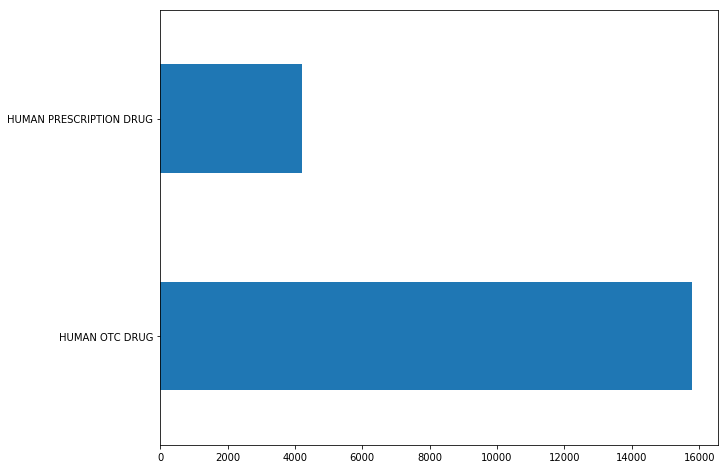

In [68]:
# Lets break the dataset into Prescription vs Over the Counter
df_openfda['product_type'].value_counts().plot(kind='barh')

Most of the drugs here are over the counter (OTC).  My guess is that OTC drugs have less useful info, partly because they would include all that homeopathic nonsense and items like Oxygen which are of little importance to this study.  But lets see if we can visualize this further to better explore that hypothesis.

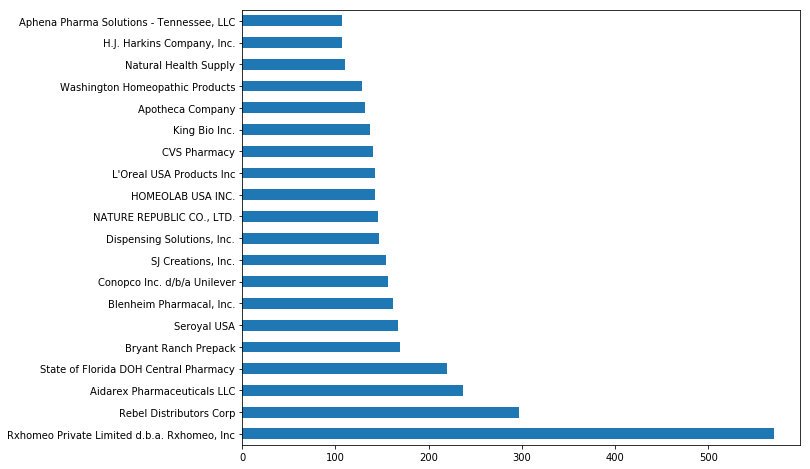

In [71]:
# Lets look at the total number of drugs for the top 20 manufactures with the most drugs in this set
df_openfda['manufacturer_name'].value_counts()[0:20].plot(kind='barh')

#### Groupby and merging for richer visuals
Now here's a question: For each manufacture, how many of their drugs are OTC and how many prescription?

In [86]:
# group by product type and manufacturer, calculate total number of drugs for each category
grouped = df_openfda.groupby(['product_type', 'manufacturer_name']).size()
grouped

product_type             manufacturer_name                     
HUMAN OTC DRUG           1004LABORATORY                             7
                         21st Century Homeopathics, Inc             1
                         220 LABORATORIES INC                       1
                         220 Laboratories Inc                       2
                         220 Laboratories Inc.                      1
                         29 Luxury Goods, Inc.                      1
                         360 Perspective                            4
                         38 Biotech Laboratory LLC                  1
                         7-11                                       1
                         7-Eleven                                   5
                         7T Pharma LLC                              1
                         A Joint-stock Corporation GMC Holdings     2
                         A P J Laboratories Limited                 6
                         A

In [87]:
# Unstack series into dataframe
grouped = grouped.unstack('product_type')
grouped.head()

product_type,HUMAN OTC DRUG,HUMAN PRESCRIPTION DRUG
manufacturer_name,,
1004LABORATORY,7.0,NaN
"21st Century Homeopathics, Inc",1.0,NaN
220 LABORATORIES INC,1.0,NaN
220 Laboratories Inc,2.0,NaN
220 Laboratories Inc.,1.0,NaN


In [88]:
grouped = grouped.fillna(0)
grouped.head()

product_type,HUMAN OTC DRUG,HUMAN PRESCRIPTION DRUG
manufacturer_name,,
1004LABORATORY,7.0,0.0
"21st Century Homeopathics, Inc",1.0,0.0
220 LABORATORIES INC,1.0,0.0
220 Laboratories Inc,2.0,0.0
220 Laboratories Inc.,1.0,0.0


In [89]:
grouped['total_drug'] = grouped['HUMAN OTC DRUG']+grouped['HUMAN PRESCRIPTION DRUG']
grouped.sort_values('total_drug', inplace=True, ascending=False)
grouped.head()

product_type,HUMAN OTC DRUG,HUMAN PRESCRIPTION DRUG,total_drug
manufacturer_name,,,
"Rxhomeo Private Limited d.b.a. Rxhomeo, Inc",570.0,0.0,570.0
Rebel Distributors Corp,46.0,251.0,297.0
Aidarex Pharmaceuticals LLC,22.0,215.0,237.0
State of Florida DOH Central Pharmacy,12.0,208.0,220.0
Bryant Ranch Prepack,15.0,154.0,169.0


Text(0.5, 0, 'Number of Drugs')

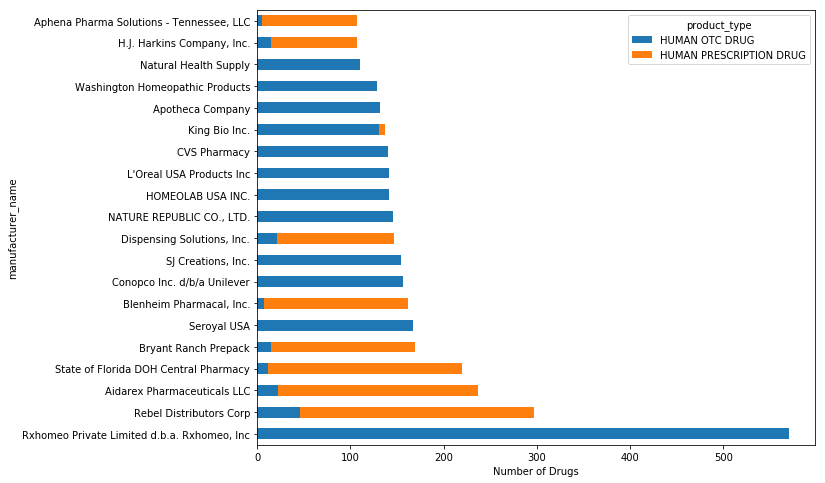

In [90]:
grouped[['HUMAN OTC DRUG','HUMAN PRESCRIPTION DRUG']][0:20].plot(kind='barh', stacked=True)
plt.xlabel('Number of Drugs')

Do OTC drugs have more or less info than prescription?

In [93]:
print('average number of null columns:')
print('OTC:', df_openfda.query('product_type == "HUMAN OTC DRUG"').isnull().sum(axis=1).mean())
print('Prescription:', df_openfda.query('product_type == "HUMAN PRESCRIPTION DRUG"').isnull().sum(axis=1).mean())

average number of null columns:
OTC: 7.366102554351271
Prescription: 6.851290551740469


## Text Analysis

In [23]:
df[df['abuse'].notna()].iloc[0:5]['abuse']

75     [9.2 Abuse In animal studies, duloxetine did n...
135    [9.2 Abuse Risperidone has not been systematic...
136    [9.2 Abuse Gabapentin does not exhibit affinit...
154    [9.2 Abuse Gabapentin does not exhibit affinit...
225    [9.2 Abuse Abuse and addiction are separate an...
Name: abuse, dtype: object

In [24]:
for c in df.columns:
    print(c)
    print(df[df[c].notna()].iloc[0:5][c])
    print()

abuse
75     [9.2 Abuse In animal studies, duloxetine did n...
135    [9.2 Abuse Risperidone has not been systematic...
136    [9.2 Abuse Gabapentin does not exhibit affinit...
154    [9.2 Abuse Gabapentin does not exhibit affinit...
225    [9.2 Abuse Abuse and addiction are separate an...
Name: abuse, dtype: object

accessories
10162    [CNS Depression Promethazine HCl Suppositories...
14834    [Other Information Store at 20° - 25°C (68°-77...
Name: accessories, dtype: object

active_ingredient
0    [HPUS Active Ingredients Each dose contains eq...
1            [Active ingredient Colloidal oatmeal 43%]
3    [Active ingredient (in each extended-release t...
5    [ACTIVE INGREDIENT Active Ingredient: Hamameli...
6            [Active ingredient Benzoyl Peroxide 2.5%]
Name: active_ingredient, dtype: object

active_ingredient_table
81     [<table width="50%"> <col width="75%" align="l...
87     [<table width="60%"> <col width="75%" align="l...
197    [<table width="60%"> <col width="75%" a

2     [11 DESCRIPTION Levocetirizine dihydrochloride...
4     [11 DESCRIPTION Ramipril is a 2-aza-bicyclo [3...
9     [11 DESCRIPTION Articaine HCl and Epinephrine ...
11    [DESCRIPTION Atracurium besylate is an interme...
23    [DESCRIPTION Cephalexin capsules USP is a semi...
Name: description, dtype: object

description_table
92     [<table> <col/> <col/> <tbody> <tr> <td valign...
203    [<table width="80%"> <col/> <col/> <thead> <tr...
336    [<table width="90%" styleCode="Noautorules"> <...
375    [<table width="80%"> <col/> <col/> <thead> <tr...
412    [<table width="80%"> <col width="40%"/> <col w...
Name: description_table, dtype: object

do_not_use
3      [Do not use •for children under 12 years of age]
6     [Do Not Use • if you have very sensitive skin ...
10    [Do not use with any other drug containing ace...
12    [Do not use if you have difficulty swallowing ...
16    [Do not use this product on infants under 6 mo...
Name: do_not_use, dtype: object

do_not_use_table
60

2538     [Information for patients: Release of benzonat...
8515     [Other Information: Active ingredients are man...
9360     [Other information Active ingredients are manu...
10463    [Information of owner Product Of Chios CHIA GI...
13425    [Other information: Active ingredients are man...
Name: information_for_owners_or_caregivers, dtype: object

information_for_patients
2     [17 PATIENT COUNSELING INFORMATION 17.1 Somnol...
4     [17 PATIENT COUNSELING INFORMATION 17.1 Angioe...
9     [17 PATIENT COUNSELING INFORMATION Loss of Sen...
14    [Made in the UK The Boots Company PLC Nottingh...
24    [17 PATIENT COUNSELING INFORMATION Patients ta...
Name: information_for_patients, dtype: object

information_for_patients_table
24     [<table width="100%"> <col width="19%"/> <col ...
328    [<table> <col/> <col/> <tbody> <tr> <td> <cont...
334    [<table cellspacing="0" cellpadding="0" border...
341    [<table width="30%"> <col width="17%"/> <col w...
709    [<table> <col/> <col/> <tbod

0                                [68703-252-02]
1                                [69968-0199-5]
2    [63187-663-60, 63187-663-90, 63187-663-30]
3                                [46122-351-74]
4    [63187-675-30, 63187-675-90, 63187-675-60]
Name: openfda.package_ndc, dtype: object

openfda.pharm_class_cs
1      [Grain Proteins [Chemical/Ingredient], Dietary...
45     [Nonsteroidal Anti-inflammatory Compounds [Che...
116    [Nonsteroidal Anti-inflammatory Compounds [Che...
124    [Nonsteroidal Anti-inflammatory Compounds [Che...
137    [Nonsteroidal Anti-inflammatory Compounds [Che...
Name: openfda.pharm_class_cs, dtype: object

openfda.pharm_class_epc
1      [Non-Standardized Food Allergenic Extract [EPC...
4        [Angiotensin Converting Enzyme Inhibitor [EPC]]
45           [Nonsteroidal Anti-inflammatory Drug [EPC]]
116          [Nonsteroidal Anti-inflammatory Drug [EPC]]
124    [Nonsteroidal Anti-inflammatory Drug [EPC], Pl...
Name: openfda.pharm_class_epc, dtype: object

openfda.ph

purpose_table
81     [<table width="50%"> <col width="75%" align="l...
87     [<table width="60%"> <col width="75%" align="l...
197    [<table width="60%"> <col width="75%" align="l...
273    [<table width="55%"> <col width="80%" align="l...
326    [<table width="65%"> <col width="50%" align="l...
Name: purpose_table, dtype: object

questions
1     [Questions? 866-4AVEENO; Outside US, dial coll...
3               [Questions or comments? 1-800-719-9260]
6        [Questions or Comments 1-844-88OCEAN (6-2326)]
7     [QUESTIONS: Dist. by Energique, Inc. 201 Apple...
12    [Questions or comments? Call 1-877-753-3935 Mo...
Name: questions, dtype: object

questions_table
656      [<table width="100%"> <colgroup> <col width="1...
3689     [<table> <col width="20%"/> <tbody> <tr> <td c...
7712     [<table width="100%" ID="i71f2b556-6077-4dfa-8...
8409     [<table width="100%"> <colgroup> <col width="1...
10686    [<table frame="void" width="590"> <tbody> <tr>...
Name: questions_table, dtype: ob

0    1
1    1
2    1
3    1
4    1
Name: version, dtype: object

veterinary_indications
5055    [5.1 Sedation Carisoprodol Tablets have sedati...
Name: veterinary_indications, dtype: object

warnings
0    [Warnings If symptoms persist or worsen, consu...
1    [Warnings For external use only. When using th...
3    [Warnings Do not use •for children under 12 ye...
5    [WARNINGS Warnings: 1. If the following sympto...
6                     [Warnings For external use only]
Name: warnings, dtype: object

warnings_and_cautions
2     [5 WARNINGS AND PRECAUTIONS 1.Avoid engaging i...
4     [5 WARNINGS AND PRECAUTIONS •Angioedema: incre...
9     [5 WARNINGS AND PRECAUTIONS Accidental Intrava...
14    [Warnings For external use only Do not use on ...
24    [5 WARNINGS AND PRECAUTIONS Skeletal muscle ef...
Name: warnings_and_cautions, dtype: object

warnings_and_cautions_table
24     [<table ID="_RefID088259FE67504F2D867F130C820E...
75     [<table cellpadding="0pt" cellspacing="0pt" wi...
135   

In [28]:
df[df['adverse_reactions'].notna()].iloc[0]['adverse_reactions']

['6 ADVERSE REACTIONS Use of levocetirizine dihydrochloride has been associated with somnolence, fatigue, asthenia, and urinary retention. [see Warnings and Precautions (5) ]. The most common adverse reactions (rate ≥2% and > placebo) were somnolence, nasopharyngitis, fatigue, dry mouth, and pharyngitis in subjects 12 years of age and older, and pyrexia, somnolence, cough, and epistaxis in children 6 to 12 years of age. In subjects 1 to 5 years of age, the most common adverse reactions (rate ≥2% and > placebo) were pyrexia, diarrhea, vomiting, and otitis media. In subjects 6 to 11 months of age, the most common adverse reactions (rate ≥3% and > placebo) were diarrhea and constipation. (6.1). To report SUSPECTED ADVERSE REACTIONS, contact Vensun Pharmaceuticals, Inc. at 1-800-385-1540 or FDA at 1-800-FDA-1088 or www.fda.gov/medwatch. 6.1 Clinical Trials Experience The safety data described below reflect exposure to levocetirizine dihydrochloride in 2708 patients with seasonal or perenni

In [29]:
from textblob import TextBlob

In [32]:
blob = TextBlob(df[df['adverse_reactions'].notna()].iloc[0]['adverse_reactions'][0])

In [33]:
blob.tags

[('6', 'CD'),
 ('ADVERSE', 'NNP'),
 ('REACTIONS', 'NNP'),
 ('Use', 'NNP'),
 ('of', 'IN'),
 ('levocetirizine', 'NN'),
 ('dihydrochloride', 'NN'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('associated', 'VBN'),
 ('with', 'IN'),
 ('somnolence', 'NN'),
 ('fatigue', 'NN'),
 ('asthenia', 'NN'),
 ('and', 'CC'),
 ('urinary', 'JJ'),
 ('retention', 'NN'),
 ('[', 'NNS'),
 ('see', 'VBP'),
 ('Warnings', 'NNS'),
 ('and', 'CC'),
 ('Precautions', 'NNP'),
 ('5', 'CD'),
 (']', 'NN'),
 ('The', 'DT'),
 ('most', 'RBS'),
 ('common', 'JJ'),
 ('adverse', 'JJ'),
 ('reactions', 'NNS'),
 ('rate', 'NN'),
 ('≥2', 'CD'),
 ('%', 'NN'),
 ('and', 'CC'),
 ('>', 'NNP'),
 ('placebo', 'NN'),
 ('were', 'VBD'),
 ('somnolence', 'NN'),
 ('nasopharyngitis', 'NN'),
 ('fatigue', 'NN'),
 ('dry', 'JJ'),
 ('mouth', 'NN'),
 ('and', 'CC'),
 ('pharyngitis', 'NN'),
 ('in', 'IN'),
 ('subjects', 'NNS'),
 ('12', 'CD'),
 ('years', 'NNS'),
 ('of', 'IN'),
 ('age', 'NN'),
 ('and', 'CC'),
 ('older', 'JJR'),
 ('and', 'CC'),
 ('pyrexia', 'NN'),
 ('so

In [34]:
blob.noun_phrases

WordList(['adverse reactions', 'levocetirizine dihydrochloride', 'urinary retention', 'warnings', 'precautions', 'common adverse reactions', 'rate ≥2 %', '> placebo', 'dry mouth', 'common adverse reactions', 'rate ≥2 %', '> placebo', 'otitis media', 'common adverse reactions', 'rate ≥3 %', '> placebo', 'suspected adverse reactions', 'vensun pharmaceuticals', 'fda', 'clinical trials experience', 'safety data', 'reflect exposure', 'levocetirizine dihydrochloride', 'perennial allergic rhinitis', 'chronic idiopathic urticaria', 'clinical trials', 'months duration', 'safety data', 'clinical trials', 'levocetirizine dihydrochloride', 'short-term safety data', 'pediatric patients', 'clinical trials', 'perennial allergic rhinitis', 'levocetirizine dihydrochloride', 'clinical trial', 'allergic rhinitis', 'chronic idiopathic urticaria', 'levocetirizine dihydrochloride', 'clinical trial', 'allergic rhinitis', 'chronic urticaria', 'levocetirizine dihydrochloride', 'safety data', 'clinical trials',

In [ ]:
#look up medical word2vec, compare semantic stuff with drugs, see if you can guess the drug by description